# CSC/XMM validation catalogs

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


matplotlib settings set
matplotlib settings set


***

In [3]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
1406779,9011,2578,608373,157.990565,57.069402,0.175837,0.153222,0.376606,-0.196001,-1.158899,-25.527662,-22.554577,978.03876,338.35370,69.959910,4.779336,1.131982,0.001445,0.000017,24.367926,24.523695,23.553010,NaN,NaN,NaN,NaN,5.499066,2.818434,3.150007,-0.428492,-1.233007,-0.970330,-0.094194,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.397094,57824.400903,2018-03-17 09:31:48.949,2017-03-12 09:37:18.000,9011_608373_2578
2237155,9011,691,605173,155.572618,56.089455,0.385283,1.826590,4.917901,1.342927,0.115818,-7.945721,-29.175993,533.07825,205.44366,140.875550,4.409233,1.079655,0.001314,0.000017,23.490835,21.815777,20.753702,22.177309,24.838987,NaN,NaN,8.895611,26.181078,58.371056,2.819902,0.120342,-0.287981,-0.118984,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58226.262110,57784.424786,2018-04-18 06:17:26.310,2017-01-31 10:11:41.491,9011_605173_691
2244055,9011,1807,604363,156.354618,55.862680,1.228383,1.842404,2.117590,-0.510758,-1.734203,-58.079914,-462.899870,471.87140,210.52736,108.303734,4.678463,1.108461,0.001194,0.000014,22.246767,21.816399,21.674130,NaN,NaN,NaN,NaN,26.683664,26.732480,22.037563,-1.104757,-1.825830,-2.007082,-1.735348,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58226.262110,57784.426510,2018-04-18 06:17:26.310,2017-01-31 10:14:10.489,9011_604363_1807
2071943,9011,555,609154,155.668491,57.339179,0.944568,4.877754,12.332736,13.498156,7.219289,-71.444640,1689.913500,259.81357,76.46972,36.645910,2.960659,0.838988,0.001293,0.000017,22.472280,20.719070,19.738577,19.669182,20.350613,NaN,14.430085,15.225233,42.654476,74.657280,23.225690,6.612601,-2.569440,6.949636,DEV,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.388402,57787.378160,2018-03-17 09:19:17.912,2017-02-03 09:04:33.000,9011_609154_555
950877,9011,3725,610724,162.738811,57.770428,0.247810,0.217381,0.337897,2.674084,2.771304,-23.283210,-9.576284,713.11230,220.73616,116.749466,4.614787,1.101270,0.001451,0.000017,23.981821,24.134794,23.665648,21.430180,21.392134,NaN,NaN,6.617553,3.229677,3.651004,5.744482,2.908245,-0.887026,-0.039959,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.404310,57519.167060,2018-03-17 09:42:12.399,2016-05-11 04:00:34.000,9011_610724_3725


In [4]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
127274,2CXO J105601.4+570702,164.005999,57.117401,2.601822,1.976557,12.388486,2.722222,18.913416,TRUE,False,False,False,False,False,False,False,3.163585e-15,6.590803e-16,5.668090e-15,4.068751e-15,1.525782e-15,6.611721e-15,1.334882,3.733866,7.232336e-15,5.047621e-15,True
127499,2CXO J105756.5+564510,164.485609,56.752982,2.427031,1.479427,34.775476,3.575758,34.424287,TRUE,False,False,False,False,False,False,False,5.023055e-15,2.114971e-15,7.931140e-15,4.717645e-15,2.583472e-15,6.851818e-15,1.161227,3.248127,9.740700e-15,5.101304e-15,True
121693,2CXO J104508.4+592214,161.285378,59.370602,2.675538,1.643311,64.512485,4.322581,25.131623,TRUE,False,False,False,False,False,False,False,1.453614e-15,7.268070e-16,2.144081e-15,1.472550e-15,9.906242e-16,1.927701e-15,1.282772,3.588105,2.926163e-15,1.201835e-15,True
120339,2CXO J104434.3+584342,161.142931,58.728460,0.865858,0.806476,48.062980,3.222222,41.266399,TRUE,False,False,False,False,False,False,True,NaN,NaN,NaN,4.486465e-16,2.243233e-16,6.729698e-16,0.483409,1.352169,NaN,NaN,True
114674,2CXO J103335.5+574334,158.397964,57.726319,0.892770,0.818683,90.413595,5.411765,101.727204,TRUE,False,True,False,False,False,False,False,NaN,NaN,NaN,9.463004e-16,6.421324e-16,1.233570e-15,0.494869,1.384222,NaN,NaN,False


In [62]:
ero_df_orig = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
ero_df = ero_df_orig.copy()

shift = 1*60/3600
rand_ang = np.random.uniform(0, 2*np.pi, len(ero_df))
ero_df['RA_fin'] = ero_df['RA_fin'] + shift*np.cos(rand_ang)/np.cos(np.radians(ero_df['DEC_fin']))
ero_df['DEC_fin'] = ero_df['DEC_fin'] + shift*np.sin(rand_ang)


# #ero_df.sample(5)
# ero_new_cross_ero_old = cross_match_data_frames(ero_df, ero_df_orig, 'RA_fin', 'DEC_fin', 'RA_fin', 'DEC_fin',30, 'ero_old')
# ero_df = ero_df[~ero_df['srcname_fin'].isin(ero_new_cross_ero_old['srcname_fin'])]
ero_df

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,SRGe J103744.3+571156,159.436743,57.215414,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.0,0.0,0.0,1,1,159.436603,57.197499,0.318530,6.785297,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.830700,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.318530,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,SRGe J110137.5+572926,165.415181,57.506441,147.861359,53.996717,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,0.0,0.0,0.0,21,14,165.408362,57.489175,0.433455,41.040825,0.000030,6.268413e+08,6.270701e+08,0.0,0.0,2.156194,0.060969,4.025409,165.406353,57.490464,857143329024245888,7.121849,2,1,10.012074,NaN,0,HD 237963,NaN,Star,7.105646,1,1,0,0,8.146000,8.155000,8.124,47.2,55.3,51.5,1,3,1,1237658302206378052,0,3.844748,64609311305,0.433455,0.766567,1.157204,1.876362,138.528408,46.042071,1.515884e-12,7.056474e+19
2,SRGe J110537.6+585120,166.428818,58.843318,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.0,0.0,0.0,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.0,0.0,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.191000,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261000,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19
3,SRGe J102349.9+563347,155.961548,56.546631,154.343916,50.594493,2.027046,32979.832031,1.001123e-12,4.287407e-14,7451.697754,319.126190,6800.098145,0.0,0.0,0.0,3,2,155.960049,56.561896,0.161150,96.801712,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,1.095822,0.046930,29.139788,155.958041,56.563186,853150108949817088,6.997905,1,0,17.967112,-1.0,0,2MASX J10234977+5633475,0.230353,Seyfert_1,6.999458,1,1,0,1,12.966000,12.035000,9.582,44.0,48.8,32.1,1,1,0,1237655108371152952,9216701424834203648,6.968698,68241429703,0.300000,0.724683,1.093975,1.773840,133.091566,42.558086,7.704034e-13,7.963453e+19
4,SRGe J105057.2+593215,162.707175,59.531822,147.091312,51.565006,2.041233,7492.464844,9.137326e-13,2.094327e-14,4687.587402,107.442131,4686.813965,0.0,0.0,0.0,4,3,162.740153,59.536125,0.226167,3.579206,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,1.000165,0.022924,23.773006,162.738144,59.537414,861390055247564800,5.119823,2,1,18.398899,-1.0,0,2MASX J10505729+5932144,0.085280,Seyfert_1,5.102316,2,1,1,0,12.489000,11.947000,8.799,48.3,51.5,42.9,2,2,0,1237655368746336397,631642530626168832,5.075234,56915973694,0.318686,0.729755,1.101632,1.786255,135.192778,46.969604,7.031529e-13,7.898503e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,SRGe J102315.1+561957,155.788396,56.342083,154.718419,50.650679,12.277468,6.259035,1.637604e-15,6.023096e-16,14.734348,5.419283,8219.958008,0.0,0.0,0.0,8816,7662,155.815079,56.331271,3.503645,66.729698,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.001793,0.000659,31.568741,

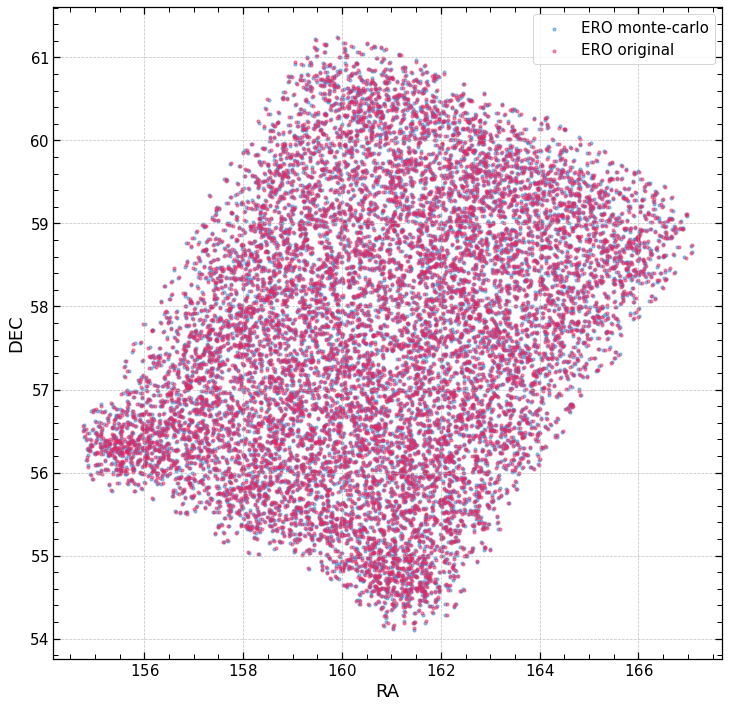

In [63]:
fig,  ax =  plt.subplots( figsize = (12,12))
ax.scatter(ero_df['RA_fin'], ero_df['DEC_fin'], s=10, label='ERO monte-carlo', color = 'C0', alpha = 0.5)
ax.scatter(ero_df_orig['RA_fin'], ero_df_orig['DEC_fin'], s=10, label='ERO original', color = 'C1', alpha = 0.5)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()

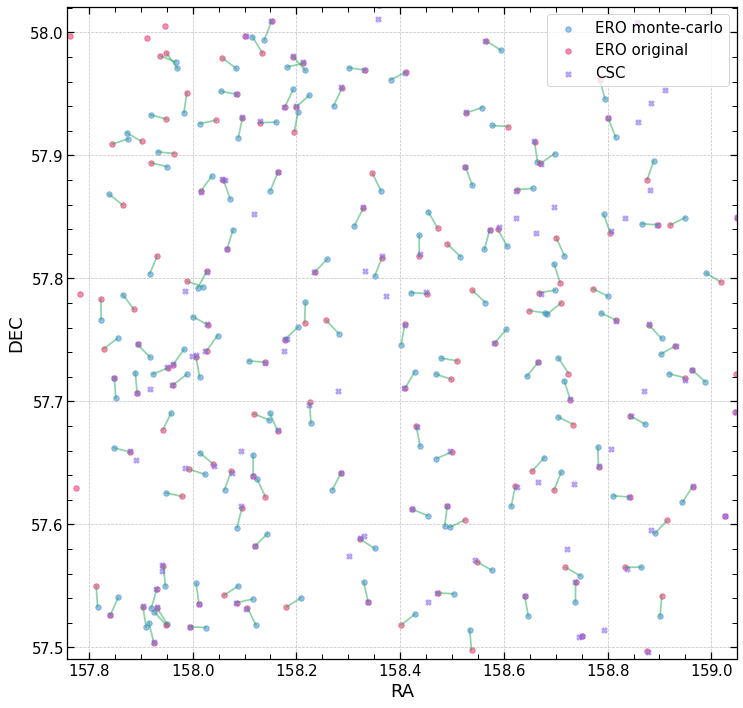

In [64]:
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.set_xlim(160, 161)
#ax.set_ylim(58, 59)

query = f"RA_fin<{159} & RA_fin>{157.8} & DEC_fin<{58.0} & DEC_fin>{57.5}"

df_for_plot = ero_df.query(query)


ax.scatter(df_for_plot['RA_fin'], df_for_plot['DEC_fin'], s=30, label='ERO monte-carlo', color = 'C0', alpha = 0.5)
ax.set_xlim()
ax.set_ylim()
ax.scatter(ero_df_orig['RA_fin'], ero_df_orig['DEC_fin'], s=30, label='ERO original', color = 'C1', alpha = 0.5)

ax.scatter(csc_df.query("flux_05_2>3e-15")['ra'], csc_df.query("flux_05_2>3e-15")['dec'], s=30, label='CSC', color = 'C3', alpha = 0.5, marker = 'X')

for i in range(len(df_for_plot)):
    srcid = df_for_plot.iloc[i]['srcname_fin']
    ra_new = df_for_plot.iloc[i]['RA_fin']
    dec_new = df_for_plot.iloc[i]['DEC_fin']
    ra_old = ero_df_orig.query(f"srcname_fin=='{srcid}'")['RA_fin'].values[0]
    dec_old = ero_df_orig.query(f"srcname_fin=='{srcid}'")['DEC_fin'].values[0]
    ax.plot([ra_new, ra_old], [dec_new, dec_old], color='C2', alpha=0.5)

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.legend()


# CSC

## CSC x ERO cross-match

In [65]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 189 out of 9215 x 2329
	 total unique pairs: 177
	 total non-unique pairs (duplicates in df2): 12
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 109


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
20,SRGe J104445.6+585408,161.188763,58.918991,148.704037,51.414729,4.030515,141.354462,2.424907e-14,2.679522e-15,115.841385,12.800470,4364.315430,0.0,0.0,0.0,1216,972,161.192021,58.901047,1.587714,71.209969,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.026543,0.002933,18.448372,161.190012,58.902337,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 246,1.060799,QSO,7.266153,1,1,0,1,17.160000,16.322001,12.215,9.4,5.6,0.9,1,1,1,1237658304890011897,9215690423540142080,7.265187,59254683777,1.587714,1.440936,2.175226,3.527047,134.738062,46.003746,1.866061e-14,7.648420e+19,2CXO J104441.8+585519,161.174350,58.921963,2.129458,1.314029,130.938686,1.948718,14.464248,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,1.536911e-16,1.674871e-16,2.912819e-17,3.058460e-16,1.022268,2.859435,1.674871e-16,2.488119e-16,True,28.843251,1,1
51,SRGe J103326.3+580120,158.357747,58.005535,151.282308,50.825417,5.020303,53.824329,1.213493e-14,2.009993e-15,56.700546,9.391706,4268.718262,0.0,0.0,0.0,2941,2340,158.361487,58.020887,2.077301,194.585632,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.013283,0.002200,18.452236,158.359478,58.022177,855021645247596160,7.236176,1,0,20.822042,-1.0,0,CLASXS 223,0.736000,Seyfert_1,7.229667,1,1,0,0,15.497000,14.840000,12.051,27.4,18.7,4.1,1,2,1,1237658304352354602,0,6.910048,62568073728,2.077301,1.794792,2.709404,4.393198,133.617941,44.472730,9.338301e-15,5.717939e+19,2CXO J103325.5+580039,158.356612,58.010891,1.086512,0.975185,142.929266,6.322175,492.552845,TRUE,False,False,False,False,False,False,False,1.719925e-15,1.009521e-15,2.392939e-15,3.500779e-15,2.652105e-15,4.349452e-15,0.596452,1.668366,5.220704e-15,1.548585e-15,True,19.402516,1,1
15,SRGe J105558.4+574636,163.964114,57.782387,148.419888,53.258974,3.619831,208.879837,3.170498e-14,3.067127e-15,146.234055,14.146622,4213.747559,0.0,0.0,0.0,840,682,163.995549,57.775479,1.375328,170.182861,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.034704,0.003357,18.106346,163.993541,57.776768,860202101652747264,6.516883,1,0,21.326550,-1.0,0,NaN,NaN,NaN,-1.000000,0,1,0,0,15.696000,14.924000,12.278,24.9,17.8,2.9,1,1,1,1237658302742987139,0,6.544413,63506171580,1.375328,1.294114,1.953585,3.167664,137.393972,45.863465,2.439822e-14,6.473222e+19,2CXO J105552.6+574702,163.969505,57.783964,2.242433,2.007640,115.051972,1.783784,11.797708,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,1.875362e-15,0.000000e+00,0.000000e+00,2.285398e-15,1.229636,3.439476,0.000000e+00,2.956354e-15,True,11.803826,1,1
108,SRGe J103214.4+573232,158.087625,57.550035,152.043981,50.983733,8.746717,18.088249,6.636330e-15,1.656048e-15,31.313316,7.814012,4310.707520,0.0,0.0,0.0,2340,1847,158.062147,57.540989,3.819787,52.289055,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.007264,0.001813,19.225595,158.060139,57.542278,-1,-1.000000,0,-1,NaN,-1.0,-1,CXCCLASXS J103214.3+573228,0.750000,X,4.825849,1,1,0,1,17.224001,16.128000,12.909,9.8,7.4,-0.2,1,0,-1,0,0,NaN,64408868124,3.819787,3.127011,4.720511,7.65

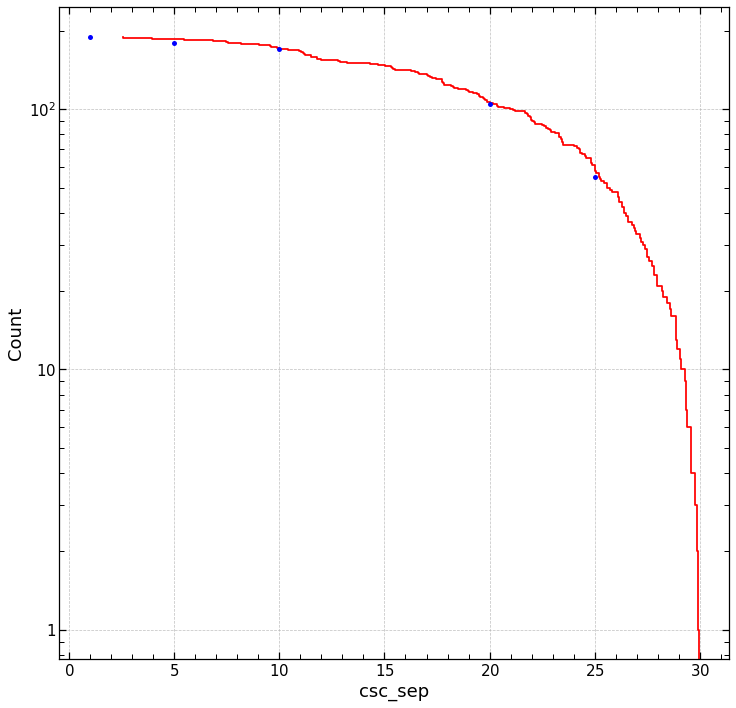

In [66]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc_orig, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')

ax.plot([20,10, 5, 1, 25], [105, 170, 180, 190, 55], 'bo')


In [73]:
ero_df.query('DET_LIKE_0>15')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,SRGe J103744.3+571156,159.436743,57.215414,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.0,0.0,0.0,1,1,159.436603,57.197499,0.318530,6.785297,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.830700,BLLac,6.040664,4,1,1,1,12.218000,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.318530,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,SRGe J110137.5+572926,165.415181,57.506441,147.861359,53.996717,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,0.0,0.0,0.0,21,14,165.408362,57.489175,0.433455,41.040825,0.000030,6.268413e+08,6.270701e+08,0.0,0.0,2.156194,0.060969,4.025409,165.406353,57.490464,857143329024245888,7.121849,2,1,10.012074,NaN,0,HD 237963,NaN,Star,7.105646,1,1,0,0,8.146000,8.155000,8.124,47.2,55.3,51.5,1,3,1,1237658302206378052,0,3.844748,64609311305,0.433455,0.766567,1.157204,1.876362,138.528408,46.042071,1.515884e-12,7.056474e+19
2,SRGe J110537.6+585120,166.428818,58.843318,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.0,0.0,0.0,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.0,0.0,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.191000,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261000,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19
3,SRGe J102349.9+563347,155.961548,56.546631,154.343916,50.594493,2.027046,32979.832031,1.001123e-12,4.287407e-14,7451.697754,319.126190,6800.098145,0.0,0.0,0.0,3,2,155.960049,56.561896,0.161150,96.801712,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,1.095822,0.046930,29.139788,155.958041,56.563186,853150108949817088,6.997905,1,0,17.967112,-1.0,0,2MASX J10234977+5633475,0.230353,Seyfert_1,6.999458,1,1,0,1,12.966000,12.035000,9.582,44.0,48.8,32.1,1,1,0,1237655108371152952,9216701424834203648,6.968698,68241429703,0.300000,0.724683,1.093975,1.773840,133.091566,42.558086,7.704034e-13,7.963453e+19
4,SRGe J105057.2+593215,162.707175,59.531822,147.091312,51.565006,2.041233,7492.464844,9.137326e-13,2.094327e-14,4687.587402,107.442131,4686.813965,0.0,0.0,0.0,4,3,162.740153,59.536125,0.226167,3.579206,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,1.000165,0.022924,23.773006,162.738144,59.537414,861390055247564800,5.119823,2,1,18.398899,-1.0,0,2MASX J10505729+5932144,0.085280,Seyfert_1,5.102316,2,1,1,0,12.489000,11.947000,8.799,48.3,51.5,42.9,2,2,0,1237655368746336397,631642530626168832,5.075234,56915973694,0.318686,0.729755,1.101632,1.786255,135.192778,46.969604,7.031529e-13,7.898503e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,SRGe J104450.9+544237,161.237338,54.718172,154.047002,54.085256,6.466908,18.975246,3.146716e-15,8.177599e-16,28.241011,7.339197,8199.176758,0.0,0.0,0.0,3613,2880,161.214036,54.708885,2.764709,27.099447,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.003444,0.000895,27.740253,

In [72]:
ero_csc_orig.query('DET_LIKE_0>15')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
0,SRGe J105835.2+564717,164.619222,56.781098,149.206059,54.200177,8.872812,82.931900,2.808731e-13,3.030535e-14,196.387772,21.189638,638.780701,0.0,0.0,0.0,572,473,164.648852,56.786801,3.877599,83.298302,0.000029,6.268413e+08,6.270701e+08,0.0,0.0,0.307442,0.033172,60.279346,164.646843,56.788090,-1,-1.000000,0,-1,NaN,-1.0,-1,NAME UMA II Cl.I,0.072000,Galaxy,12.686233,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,67351808894,3.877599,3.172091,4.788563,7.764474,138.588111,45.228805,2.161428e-13,8.556663e+19,2CXO J105826.0+564700,164.608461,56.783457,0.807851,0.781031,91.939723,4.000000,49.960647,TRUE,False,False,False,False,False,False,False,1.106501e-14,7.000310e-15,1.490389e-14,5.411925e-15,3.020610e-15,7.677383e-15,0.459063,1.284067,1.647693e-14,6.489178e-15,True,22.859330,1,1
1,SRGe J105316.7+573551,163.320784,57.580728,149.051263,53.121417,2.276231,2174.864502,1.725409e-13,6.469277e-15,812.061157,30.447554,4299.759277,0.0,0.0,0.0,69,52,163.321430,57.596089,0.552070,122.975891,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.188862,0.007081,20.381672,163.319421,57.597379,854201065972345600,5.689724,1,0,18.651224,-1.0,0,[VV98] J105316.9+573552,1.205080,QSO,5.691327,1,1,1,1,15.423000,14.243000,11.329,30.2,26.9,7.9,1,1,1,1237658302742790373,1068523857410811904,5.741403,64196577994,0.552070,0.813768,1.228458,1.991898,137.102269,45.516323,1.327770e-13,6.910412e+19,2CXO J105319.9+573438,163.333278,57.577267,1.372301,0.913575,65.936544,2.648649,16.002266,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.673511,1.883910,NaN,NaN,True,27.144082,1,1
2,SRGe J104503.3+591243,161.249334,59.226863,148.293673,51.237214,2.689901,721.732483,7.350630e-14,4.361405e-15,343.688599,20.392338,4271.575684,0.0,0.0,0.0,222,185,161.265708,59.210616,0.846322,86.861870,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.080459,0.004774,17.441483,161.263699,59.211906,855552915519233536,5.117174,1,0,20.554012,-1.0,0,CLANS 279,0.870000,AGN,5.130082,1,1,1,1,16.474001,15.416000,12.370,16.0,12.2,2.7,1,1,0,1237653616397386143,0,5.166464,58109096746,0.846322,0.961658,1.451711,2.353895,134.541087,46.284181,5.656596e-14,8.509824e+19,2CXO J104500.6+591353,161.252861,59.231455,0.891622,0.810787,16.532063,3.371429,43.534106,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,1.300434e-16,5.387430e-16,2.624645e-16,8.012075e-16,0.492347,1.377168,5.387430e-16,4.026521e-16,True,17.761604,1,1
3,SRGe J103440.0+574355,158.644092,57.720460,151.493369,51.130725,2.868944,612.382446,6.337805e-14,4.004150e-15,300.247955,18.969309,4328.014160,0.0,0.0,0.0,237,197,158.668620,57.730713,0.956876,116.449554,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.069373,0.004383,19.187504,158.666611,57.732003,854824282906636544,6.917654,1,0,20.824614,-1.0,0,2XMM J103439.8+574355,0.451227,QSO,6.893005,1,1,0,1,15.264000,14.436000,11.543,30.7,24.2,7.0,1,2,0,1237655108908810471,7980580411771473920,7.042223,63678056154,0.956876,1.025667,1.548339,2.510573,134.023771,44.309107,4.877189e-14

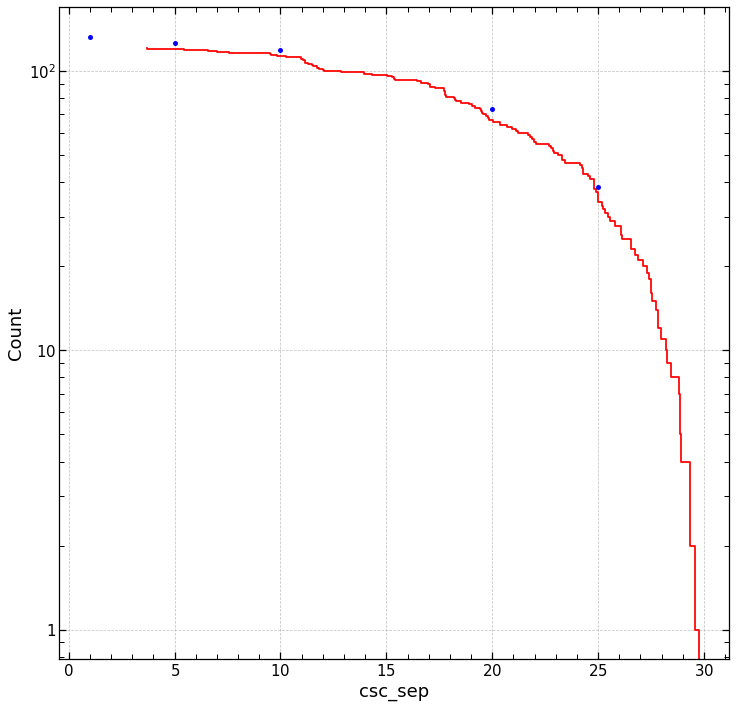

In [71]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc_orig.query('DET_LIKE_0>15'), x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')

ax.plot([20,10, 5, 1, 25], 0.7*np.array([105, 170, 180, 190, 55]), 'bo')


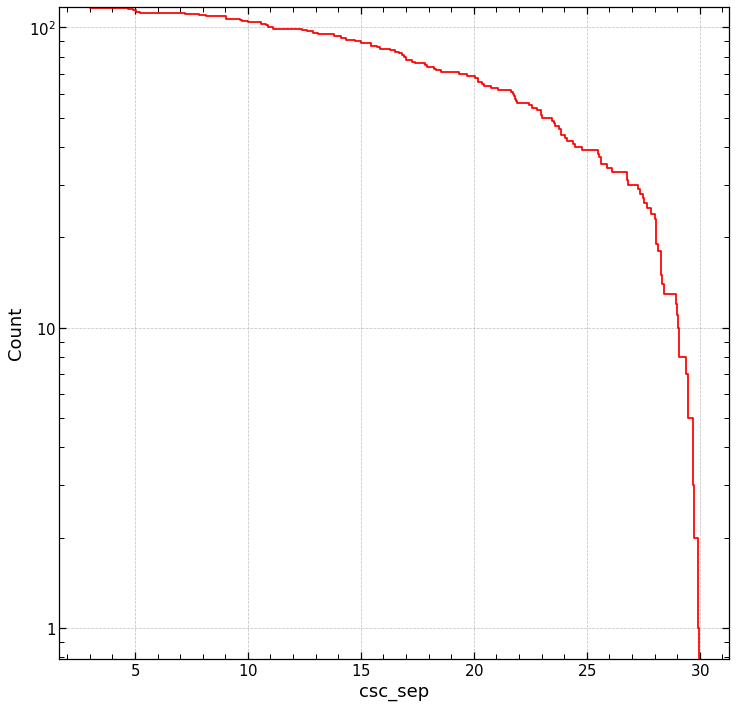

In [45]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(data = ero_csc, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
ax.set_yscale('log')

## CSC x DESI cross-match

In [10]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 477 out of 108 x 2418574
	 total unique pairs: 477
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
5,SRGe J110537.6+585120,166.486469,58.883647,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.0,0.0,0.0,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.0,0.0,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.19100,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19,2CXO J110559.0+585308,166.495912,58.885721,1.529127,1.529127,0.000000,2.210526,11.124692,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,4.095200e-16,8.902610e-17,7.300140e-16,0.883470,2.471199,NaN,NaN,True,19.087241,1,1,9011,97,614527,166.495486,58.886147,0.055641,0.319893,0.730453,4.246792,6.511009,-68.018210,-389.294040,970.85504,315.562560,80.476200,4.976627,1.205195,0.000958,0.000013,25.604645,23.716024,22.829014,20.928024,20.464760,NaN,NaN,1.733701,5.682605,6.552783,9.473895,7.147875,-2.105741,-1.377605,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,57895.180117,57545.199558,2017-05-22 04:19:22.089,2016-06-06 04:47:21.790,9011_614527_97,1.726600,8,1
6,SRGe J110537.6+585120,166.486469,58.883647,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.0,0.0,0.0,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.0,0.0,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.19100,Seyfert_1,6.883267,1,1,0,1,11.276000,10.261,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19,2CXO J110559.0+585308,166.495912,58.885721,1.529127,1.529127,0.000000,2.210526,11.124692,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,4.095200e-16,8.902610e-17,7.300140e-16,0.883470,2.471199,NaN,NaN,True,19.087241,1,1,9011,81,614527,166.492699,58.886442,0.210008,0.266554,0.367692,0.059450,-0.468924,58.744637,-384.742430,959.07260,318.131440,80.669000,5.160158,1.237113,0.000973,0.000013,24.162638,23.914133,23.574320,25.562805,NaN,18.077341,NaN,

In [11]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 60


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
346,SRGe J104641.9+591806,161.614870,59.341142,147.961905,51.332755,7.975798,12.134922,4.811572e-15,1.428756e-15,22.966434,6.819691,4360.678223,0.0,0.0,0.0,3390,2700,161.676731,59.300275,3.465341,44.433720,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.005267,0.001564,18.533394,161.674723,59.301565,-1,-1.0,0,-1,NaN,-1.0,-1,CLANS 479,2.860,QSO,2.412570,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,57779567191,3.465341,2.851402,4.304454,6.979509,134.725057,46.474122,3.702693e-15,8.721888e+19,2CXO J104626.6+592044,161.611211,59.345566,1.639599,1.239490,13.537799,3.352941,29.044334,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.985495e-15,0.000000e+00,0.000000e+00,1.288538e-15,0.839706,2.348784,0.000000e+00,3.251694e-15,True,17.285991,1,1,9011,559,615260,161.611754,59.345857,0.382936,0.498457,0.948038,2.594236,2.409986,-9.497219,-298.22577,338.91168,105.269196,55.125730,4.583746,1.112943,0.000964,0.000012,23.519970,23.240967,22.549566,21.463705,21.544182,NaN,NaN,7.049689,5.114210,7.038872,5.554179,2.542442,-0.294812,-1.023947,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58130.353889,57519.165729,2018-01-12 08:29:36.000,2016-05-11 03:58:39,9011_615260_559,1.444486,4,1,0.000000
180,SRGe J104432.6+590500,161.212486,59.052267,148.516917,51.274004,7.247107,25.063601,9.462432e-15,1.925383e-15,44.181881,8.989979,4265.686523,0.0,0.0,0.0,3619,2885,161.137943,59.081848,3.128375,146.969467,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.010358,0.002108,17.600748,161.135935,59.083138,-1,-1.0,0,-1,NaN,-1.0,-1,[VV2010c] J104432.1+590458,1.560,AGN,9.067203,1,1,1,1,17.191000,15.727000,12.079,9.3,9.4,3.0,1,0,-1,0,0,NaN,58584609126,3.128375,2.590890,3.911187,6.341843,134.562908,46.140493,7.281710e-15,7.865154e+19,2CXO J104452.3+590306,161.217975,59.051790,1.958704,1.687508,136.133262,4.378378,29.708178,TRUE,False,False,False,False,False,False,False,2.060123e-15,1.252232e-15,2.868014e-15,1.078577e-15,7.860814e-16,1.371072e-15,1.056230,2.954432,3.138700e-15,1.215107e-15,True,10.304743,1,1,9011,311,614516,161.218590,59.051734,0.162591,0.538647,1.976243,12.390124,9.386545,28.432215,267.07684,499.43365,171.485930,95.019295,4.204257,1.102175,0.001047,0.000013,24.455140,23.160208,21.753948,19.766330,20.068134,18.865345,16.433361,3.633584,7.053721,19.263987,25.405062,9.

***

# 4XMM DR10

In [12]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
248389,205562121010009,4XMM J103916.9+585925,159.820653,58.990397,1.262410,70.7661,6.363660e-15,1.972650e-15,7.090290e-15,2.252210e-15,1.367720e-14,3.217230e-15,6.609000e-15,5.130020e-15,1.537250e-14,2.572970e-14,5.701610e-14,2.689170e-14,3.722600e-14,6.446630e-15,5.701610e-14,2.689170e-14,5.701610e-14,2.689170e-14,0.053851,0.189404,0.176738,0.170951,-0.617598,0.187844,-0.359085,0.574918,0.0,NaN,-1.229790,NaN,NaN,0,54619.398750,54619.500949,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556212...,2.076749e-14,3.927215e-15,0.895235,2.504107,True
254197,201475101010017,4XMM J105045.9+571732,162.691665,57.292420,0.467413,560.3790,3.890070e-15,3.755330e-16,5.432170e-15,4.268230e-16,7.516400e-15,5.465330e-16,1.160340e-14,1.281420e-15,1.665180e-14,5.597900e-15,4.507870e-14,5.860010e-15,2.452840e-14,1.179640e-15,3.372650e-14,8.242300e-15,5.668230e-14,8.333060e-15,0.145975,0.059396,0.123057,0.051866,-0.277545,0.059217,-0.188141,0.109887,0.0,NaN,-1.791500,0.27856,False,0,52562.275475,52565.220567,0.173379,0.335016,2,False,http://xmm-catalog.irap.omp.eu/source/20147510...,1.294857e-14,6.934524e-16,0.331465,0.927157,True
249979,208223909010009,4XMM J104244.6+573915,160.686158,57.654212,1.204640,120.0470,1.063320e-14,2.840610e-15,2.270690e-14,3.762990e-15,7.622510e-15,2.331520e-15,1.665960e-15,2.729410e-15,0.000000e+00,1.798770e-14,4.554510e-14,1.948840e-14,4.416870e-14,6.469500e-15,4.554510e-14,1.948840e-14,4.554510e-14,1.948840e-14,0.405780,0.129667,-0.389365,0.135079,-0.906344,0.157602,-1.000000,1.141100,0.0,NaN,-1.599460,NaN,NaN,0,58441.381088,58441.542685,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20822390...,3.032941e-14,4.426746e-15,0.854268,2.389515,True
241137,207851306010008,4XMM J102018.9+604923,155.078889,60.823056,2.987240,24.9943,2.581630e-15,2.345260e-15,0.000000e+00,8.081320e-16,7.824700e-18,7.373670e-16,0.000000e+00,2.277790e-15,0.000000e+00,1.691940e-14,9.309680e-15,1.745630e-14,0.000000e+00,1.300880e-15,9.309680e-15,1.745630e-14,9.309680e-15,1.745630e-14,-1.000000,0.078110,1.000000,88.149300,-1.000000,99.187200,NaN,NaN,0.0,NaN,-0.966116,NaN,NaN,0,57531.955590,57532.047917,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20785130...,7.824700e-18,1.093978e-15,2.118394,5.925466,True
253887,201475108010118,4XMM J105013.2+571945,162.555061,57.329295,1.750600,7.9269,8.805150e-16,5.553970e-16,1.069960e-15,5.992130e-16,3.093140e-16,4.373430e-16,3.476840e-16,6.838570e-16,2.623450e-15,1.289980e-14,1.136420e-14,1.313910e-14,3.275610e-15,1.400080e-15,1.136420e-14,1.313910e-14,1.136420e-14,1.313910e-14,0.316370,0.330674,-0.432237,0.385049,0.534561,0.283246,-0.660154,0.589101,0.0,NaN,-0.519775,NaN,NaN,1,52564.341539,52565.220567,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20147510...,1.379274e-15,7.418390e-16,1.241434,3.472477,False


## XMM x eROSITA cross-match

In [13]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 128 out of 9215 x 1791
	 total unique pairs: 122
	 total non-unique pairs (duplicates in df2): 6
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 84


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
110,SRGe J104353.3+582141,160.941905,58.408846,149.479509,51.684721,14.062353,6.102930,4.016760e-15,1.453936e-15,18.987265,6.872771,4318.510742,0.0,0.0,0.0,6950,5838,160.974214,58.360150,6.235044,46.252769,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.004397,0.001591,19.058996,160.972206,58.361440,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,16.688999,16.530001,12.548,14.7,5.2,1.0,1,1,0,1237655108909466288,0,7.795986,61280766864,6.235044,5.027387,7.589303,12.305769,135.019196,45.487090,3.091053e-15,7.666116e+19,205562113010011,4XMM J104345.8+582411,160.940992,58.403140,1.32221,65.1283,2.207780e-15,9.641430e-16,7.317050e-15,1.714860e-15,5.709700e-15,1.735020e-15,8.415500e-15,3.961820e-15,3.818600e-14,2.379250e-14,7.401090e-14,2.479980e-14,2.288900e-14,3.999780e-15,7.401090e-14,2.479980e-14,7.401090e-14,2.479980e-14,0.546624,0.165400,-0.265970,0.167129,-0.043933,0.218596,0.463168,0.218283,0.0,NaN,-1.197050,NaN,NaN,0,54790.834549,54790.915961,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,1.302675e-14,2.439475e-15,0.937642,2.622726,True,20.612602,1,1
34,SRGe J105105.1+571920,162.795870,57.370429,149.721011,53.090019,6.520811,48.193863,1.175461e-14,2.022244e-15,54.913879,9.447299,4267.971680,0.0,0.0,0.0,3265,2597,162.773242,57.320941,2.789953,132.011215,0.000012,6.268413e+08,6.270701e+08,0.0,0.0,0.012867,0.002214,17.963789,162.771233,57.322231,-1,-1.0,0,-1,NaN,-1.0,-1,RDS 43A,1.75,AGN,8.540221,2,1,1,1,17.398001,15.975000,12.134,8.3,7.5,1.3,1,0,-1,0,0,NaN,65260862062,2.789953,2.331234,3.519213,5.706271,136.961372,45.125381,9.045628e-15,6.462670e+19,200227402010138,4XMM J105113.3+572220,162.805456,57.372368,2.53434,12.9608,3.049590e-16,2.771500e-16,3.460500e-16,2.821620e-16,3.707760e-17,2.018100e-16,0.000000e+00,9.520980e-16,2.739030e-15,9.609430e-15,5.631490e-15,9.715300e-15,3.799430e-16,4.904320e-16,5.631490e-15,9.715300e-15,5.631490e-15,9.715300e-15,0.319247,0.227755,-0.722770,0.318643,-1.000000,1.726520,1.000000,0.824869,0.0,NaN,-0.649161,NaN,NaN,0,52209.798819,52210.513183,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20022740...,3.831276e-16,3.469044e-16,1.797221,5.027097,True,19.874045,1,1
57,SRGe J105034.8+591632,162.618795,59.323706,147.448355,51.712408,6.341847,31.972807,8.193445e-15,1.709168e-15,38.310730,7.991691,4271.706543,0.0,0.0,0.0,4179,3349,162.647023,59.274244,2.706061,139.066971,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.008968,0.001871,18.692688,162.645015,59.275533,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,2,16.433001,16.180000,12.028,15.0,6.2,1.4,2,2,1,1237658304890340192,0,7.342660,57874791397,2.706061,2.267253,3.422628,5.549662,135.347752,46.725487,6.305175e-1

## XMM x DESI cross-match

In [14]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 355 out of 84 x 2418574
	 total unique pairs: 355
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
0,SRGe J105130.7+573439,162.870902,57.627335,149.342543,52.961052,2.257549,2212.055908,1.739729e-13,6.520843e-15,817.915283,30.657053,4295.108398,0.0,0.0,0.0,59,44,162.879976,57.576189,0.536485,1.125776,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.190429,0.007138,17.990770,162.877967,57.577478,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,10.042000,9.858,9.672,47.6,53.9,26.4,1,0,-1,0,0,NaN,64273280473,0.536485,0.807089,1.218375,1.975550,136.834330,45.371246,1.338790e-13,6.925637e+19,201237001010081,4XMM J105129.8+573737,162.874488,57.627050,0.239670,675.4190,2.228210e-15,1.368170e-16,3.728450e-15,1.679650e-16,3.330030e-15,1.819310e-16,4.662260e-15,3.995050e-16,1.093520e-14,2.661290e-15,3.162940e-14,2.760440e-15,1.418530e-14,4.391230e-16,1.099560e-14,1.055910e-14,6.536440e-14,2.240840e-14,0.155378,0.030281,-0.104021,0.029974,-0.307610,0.037326,-0.115517,0.081122,0.0,NaN,-0.090568,0.111350,False,1,51661.149132,52615.192419,0.365868,0.218323,13,False,http://xmm-catalog.irap.omp.eu/source/20123700...,7.058480e-15,2.476108e-16,0.169961,0.475408,True,6.988647,1,1,9011,1077,610725,162.874579,57.627066,0.990951,1.646629,1.603180,6.147722,9.032246,-26.378407,13.920693,705.96220,258.368350,155.498810,4.490071,1.062944,0.001385,0.000017,22.481588,21.939460,21.976889,20.526596,20.109516,NaN,19.640768,26.329527,26.467659,19.991520,13.026893,9.312172,-0.981628,0.057971,PSF,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,NaN,0,58194.404310,57784.444599,2018-03-17 09:42:12.399,2017-01-31 10:40:13.339,9011_610725_1077,0.185287,2,1
1,SRGe J105130.7+573439,162.870902,57.627335,149.342543,52.961052,2.257549,2212.055908,1.739729e-13,6.520843e-15,817.915283,30.657053,4295.108398,0.0,0.0,0.0,59,44,162.879976,57.576189,0.536485,1.125776,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.190429,0.007138,17.990770,162.877967,57.577478,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,10.042000,9.858,9.672,47.6,53.9,26.4,1,0,-1,0,0,NaN,64273280473,0.536485

In [15]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 51


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
238,SRGe J105433.0+572840,163.601118,57.431680,149.001979,53.327792,8.627173,15.256770,5.726420e-15,1.566899e-15,26.559132,7.267278,4237.192383,0.0,0.0,0.0,7825,6688,163.639463,57.476416,3.764938,106.427612,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.006268,0.001715,18.353601,163.637454,57.477706,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J105432.5+572841,NaN,X,9.147861,1,1,1,1,17.511999,16.684999,12.880,7.6,4.2,-1.0,1,1,1,1237655107299311857,9215494985348304896,9.143184,64658924142,3.764938,3.084273,4.655994,7.549520,137.399576,45.508821,4.406703e-15,6.781533e+19,201237001010001,4XMM J105421.1+572544,163.588229,57.428958,0.089379,41554.7000,3.080790e-14,5.413360e-16,1.088840e-13,9.666510e-16,2.210990e-13,1.373570e-15,3.753870e-13,3.085800e-15,8.719180e-13,1.365100e-14,1.647480e-12,1.420580e-14,6.696000e-13,2.925640e-15,6.329670e-13,6.744860e-14,3.045370e-12,1.110390e-13,0.554991,0.006211,0.343919,0.004473,-0.248622,0.004588,-0.314067,0.007492,0.0,NaN,-2.922490,0.032657,False,1,51661.149132,52615.192419,0.143110,0.042264,15,False,http://xmm-catalog.irap.omp.eu/source/20123700...,3.299830e-13,1.679616e-15,0.063383,0.177291,True,26.830861,1,1,9011,2012,609951,163.588328,57.428966,11.286328,32.067140,56.342457,128.124420,157.123800,370.201350,1819.120200,171.397400,60.447340,21.526585,1.660117,0.494032,0.001169,0.000016,19.844107,18.718338,18.113674,17.229517,17.008533,16.078722,14.350277,147.759300,249.315230,261.410700,165.082600,110.438220,12.655278,7.279772,SER,0.304600,0.818079,-2.057607,0.490844,-0.300292,0.426474,G2,854183031405452160,58194.410133,57737.529606,2018-03-17 09:50:35.462,2016-12-15 12:42:38.000,9011_609951_2012,0.193911,3,1,74.882055
208,SRGe J105229.1+573103,163.038035,57.494955,149.269279,53.097667,7.221514,19.934122,6.759242e-15,1.645329e-15,31.994776,7.788143,4324.426758,0.0,0.0,0.0,1289,1027,163.123075,57.516284,3.116498,64.175453,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.007399,0.001801,18.213501,163.121067,57.51

# Joining CSC and XMM counterparts

In [16]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [17]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 51
CSC companions 60
Total companions possible 111


In [18]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [19]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 37
CSC companions 32
Total companions possible 69


In [20]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')
print('len when sep/err > 3 ', final_ctps.query('sep_ero_desi/pos_sigma_2d>3').shape[0])

#final_ctps

len when sep/err > 3  59


In [31]:
len(final_ctps)

67

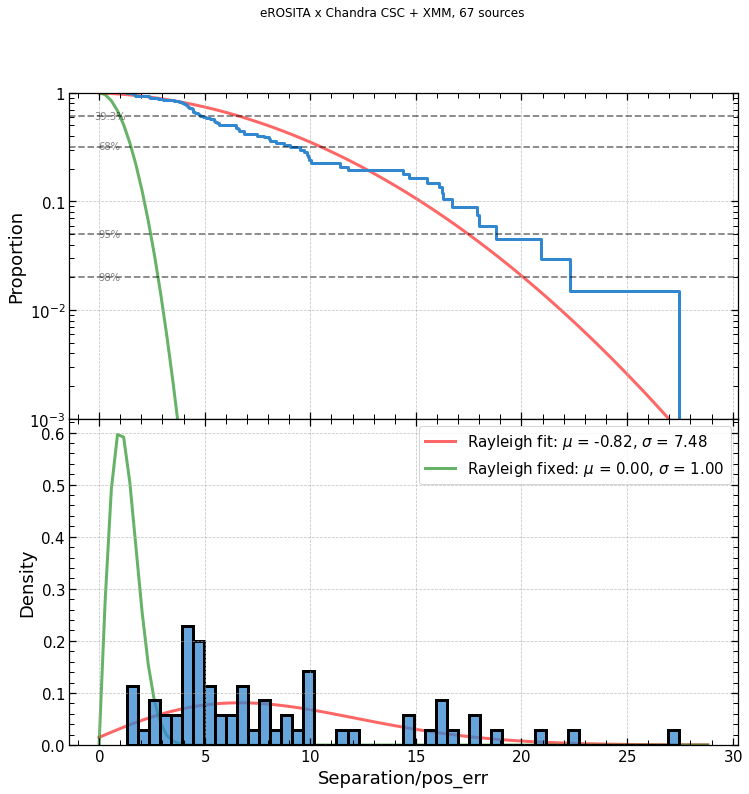

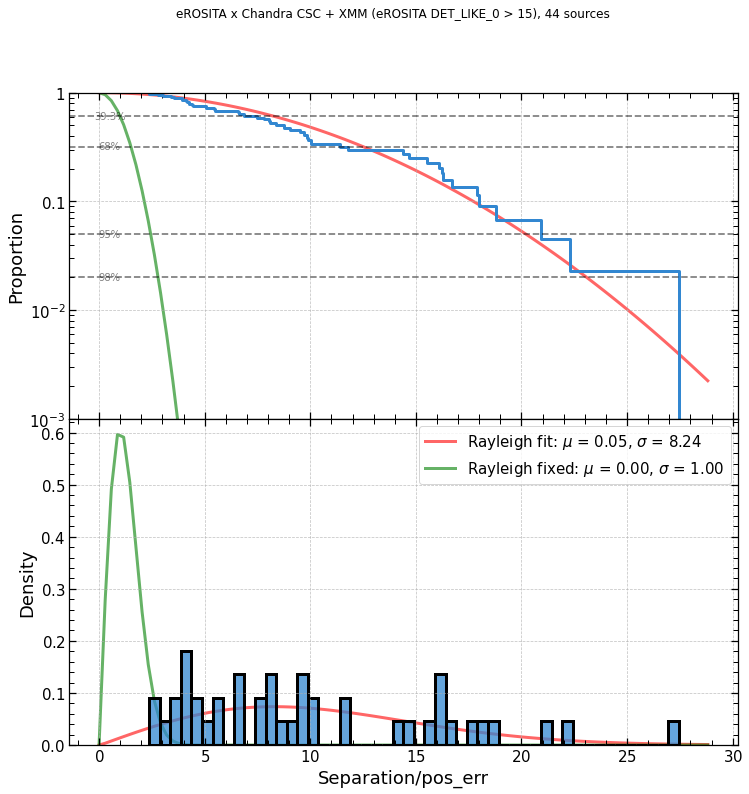

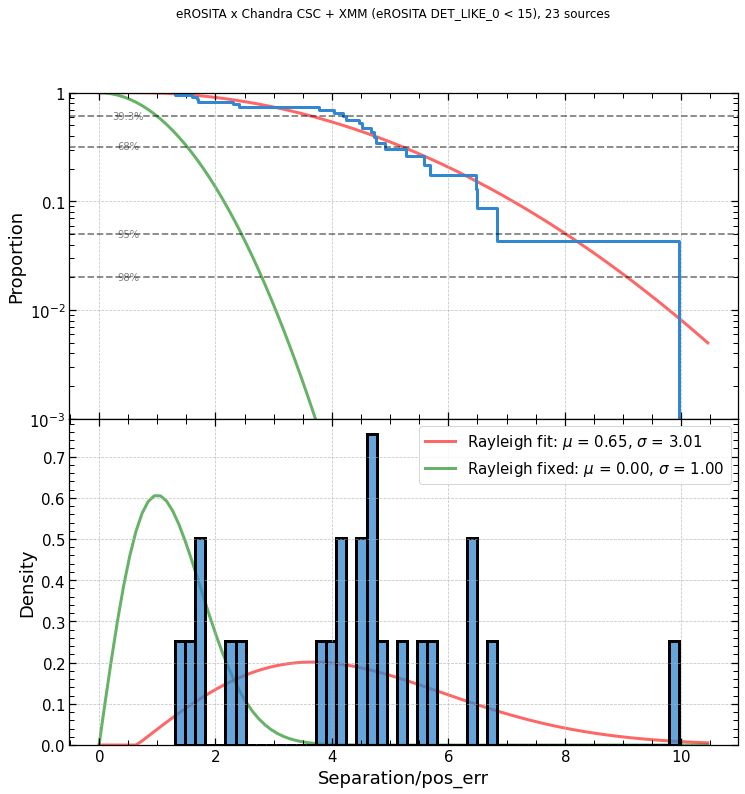

In [21]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 15)')
rayleigh_plot(final_ctps.query('DET_LIKE_0<15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 < 15)')


In [ ]:
%matplotlib inline
query = 'DET_LIKE_0<15'
seps = final_ctps.query(query)['sep_ero_desi']
sep_bins = np.linspace(0, 30, 300)

sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
sep_hist = np.cumsum(sep_hist)
hist_area = sep_hist
sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Data, '+query , complementary=True)
ax.set_xlabel('S - Separation, arcsec')
ax.set_ylabel('Number of companions within Separation<S')


from scipy.optimize import curve_fit
from scipy import stats
def gaus_cdf(x,N,sep0,sep_sigma):
    #return N*stats.norm.cdf(x, loc=sep0, scale=sep_sigma)
    return N*(1-stats.rayleigh.cdf(x, loc=sep0, scale=sep_sigma))

def linear_cdf(x,a):
    #b = -60*a
    #return a*x**2+b*x
    #return a*x**2
    return a *(30**2-x**2)

def model_cdf(x, N, sep0, sep_sigma, a):
    return gaus_cdf(x,N,sep0,sep_sigma)  + linear_cdf(x,a)

#popt, pcov = curve_fit(model_cdf, sep_axis, hist_area, p0=[1, 1, 2,  0])
#print(popt)
popt = [120, 0,  3.4, 0.9e-2]
x = np.linspace(0, 29, 100)
ax.plot(x, model_cdf(x, *popt), 'C0--', label = 'Rayleigh cdf + linear cdf')
ax.plot(x, gaus_cdf(x, *popt[:3]), 'C1--', label = 'Rayleigh cdf')
ax.plot(x, linear_cdf(x, *popt[3:]), 'C2--', label = 'linear cdf')
ax.legend()
#n_false  =linear_cdf(30, *popt[3:])
#ax.axhline(n_false, color='g', linestyle=':')
#ax.text(10, n_false+n_false/2, 'Number of false companions = {:.0f}'.format(n_false),  va='top', ha='left', fontsize = 19)

#print('Number of false companions', n_false)
ax.set_yscale('log')
ax.set_ylim(0.9, 200)
plt.show()


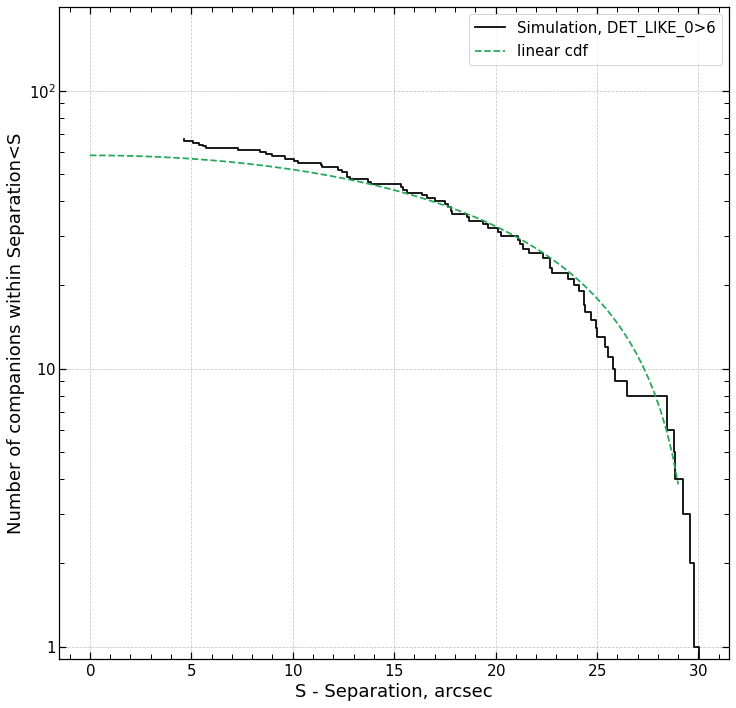

In [35]:
%matplotlib inline
query = 'DET_LIKE_0>6'
seps = final_ctps.query(query)['sep_ero_desi']
sep_bins = np.linspace(0, 30, 300)

sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
sep_hist = np.cumsum(sep_hist)
hist_area = sep_hist
sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Simulation, '+query , complementary=True)
ax.set_xlabel('S - Separation, arcsec')
ax.set_ylabel('Number of companions within Separation<S')


from scipy.optimize import curve_fit
from scipy import stats
def gaus_cdf(x,N,sep0,sep_sigma):
    #return N*stats.norm.cdf(x, loc=sep0, scale=sep_sigma)
    return N*(1-stats.rayleigh.cdf(x, loc=sep0, scale=sep_sigma))

def linear_cdf(x,a):
    #b = -60*a
    #return a*x**2+b*x
    #return a*x**2
    return a *(30**2-x**2)

def model_cdf(x, N, sep0, sep_sigma, a):
    return linear_cdf(x,a)

#popt, pcov = curve_fit(model_cdf, sep_axis, hist_area, p0=[1, 1, 2,  0])
#print(popt)
popt = [120, 0,  3.4, 7e-2]
x = np.linspace(0, 29, 100)
#ax.plot(x, model_cdf(x, *popt), 'C0--', label = 'Rayleigh cdf + linear cdf')
#ax.plot(x, gaus_cdf(x, *popt[:3]), 'C1--', label = 'Rayleigh cdf')
ax.plot(x, linear_cdf(x, *popt[3:]), 'C2--', label = 'linear cdf')
ax.legend()
#n_false  =linear_cdf(30, *popt[3:])
#ax.axhline(n_false, color='g', linestyle=':')
#ax.text(10, n_false+n_false/2, 'Number of false companions = {:.0f}'.format(n_false),  va='top', ha='left', fontsize = 19)

#print('Number of false companions', n_false)
ax.set_yscale('log')
ax.set_ylim(0.9, 200)
plt.show()
